# Red Wine Quality Prediction - Machine Learning Project

by: Rojan Aslani, Farzam Salimi

Wine quality Dataset

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

https://archive.ics.uci.edu/ml/datasets/Wine+Quality


- Supervised Learning

- Classification: Try to predict for future samples what the class is for each sample

Classification models: kNN, Naive Bayes, Log Regression, SVM, Neural Networks

In [563]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", size=14)

releavnt predictive attributes: (all)

"fix_acidity", "vol_acidity", "critic_acidity", "res_sugar", "chloride", "free_SO2", "tot_SO2", "density", "pH","sulphate", "alcohol"

The target attribute, quality ("class"), has 11 classes: from 0 to 10. in this dataset all values lye within 3-8, having no instances of class 0, 1, 2, 9, and 10. 

In [564]:
cols = ["fix_acidity", "vol_acidity", "critic_acidity", "res_sugar", "chloride", "free_SO2", "tot_SO2", "density", "pH","sulphate", "alcohol", "class"] # Quality is class

df = pd.read_csv("winequality-red.csv", names = cols, delimiter=";", header=0)

# We know what the class is so this is supervised learning - for each input we have a corresponding output
df.head()

,fix_acidity,vol_acidity,critic_acidity,res_sugar,chloride,free_SO2,tot_SO2,density,pH,sulphate,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Data Exploration

In [565]:
df.describe()

,fix_acidity,vol_acidity,critic_acidity,res_sugar,chloride,free_SO2,tot_SO2,density,pH,sulphate,alcohol,class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [566]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fix_acidity     1599 non-null   float64
 1   vol_acidity     1599 non-null   float64
 2   critic_acidity  1599 non-null   float64
 3   res_sugar       1599 non-null   float64
 4   chloride        1599 non-null   float64
 5   free_SO2        1599 non-null   float64
 6   tot_SO2         1599 non-null   float64
 7   density         1599 non-null   float64
 8   pH              1599 non-null   float64
 9   sulphate        1599 non-null   float64
 10  alcohol         1599 non-null   float64
 11  class           1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(1599, 12)

###Duplicate values

Including duplicate values will essentially lead to the model overfitting this subset of points - so they are going to be removed.

Since the duplicate data has the same attribute value in all fields (including the qualification) the duplicate ones were removed instead of applying measures of central tendency. 

In [567]:
df = df.drop_duplicates(keep='first')
df.shape

(1359, 12)

###Univariate Analysis

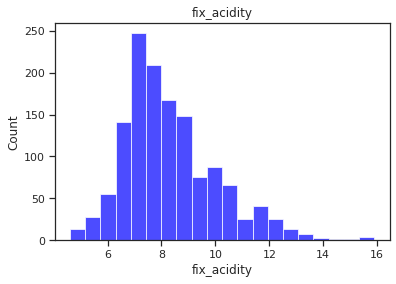

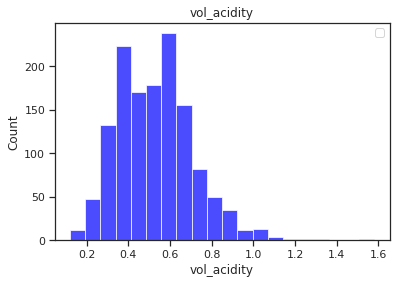

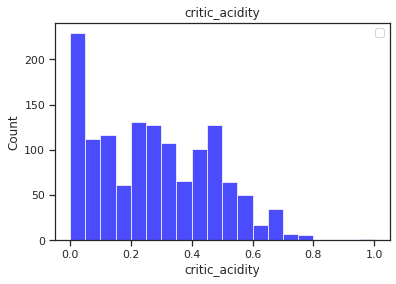

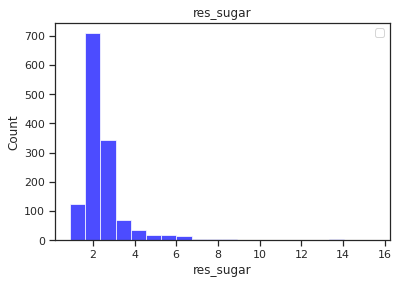

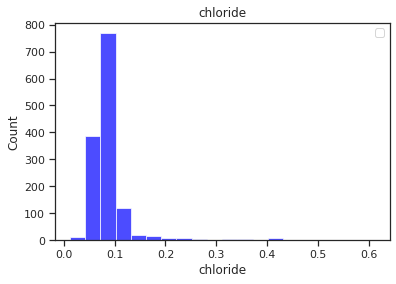

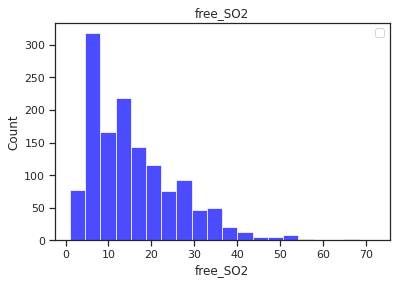

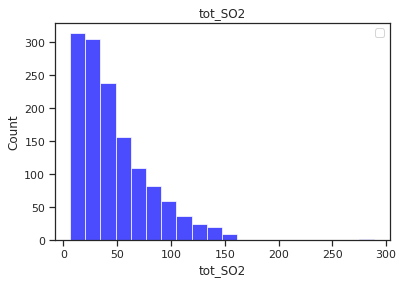

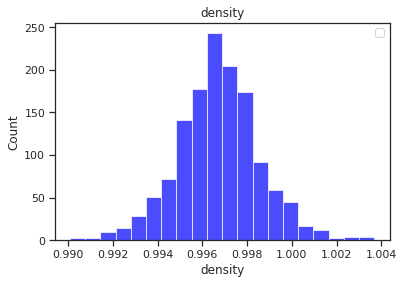

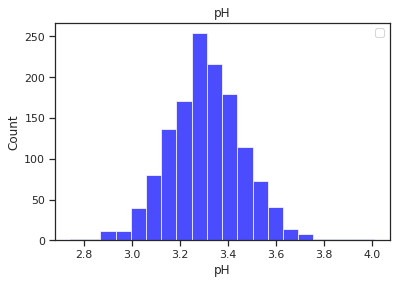

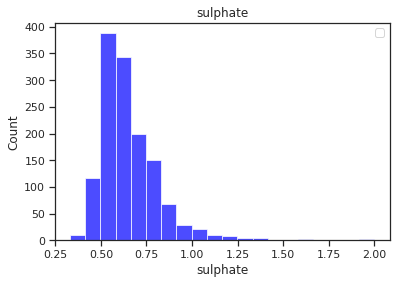

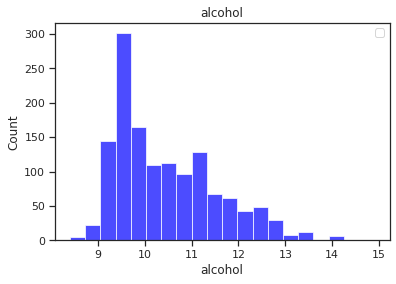

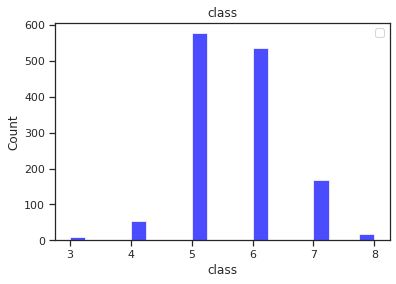

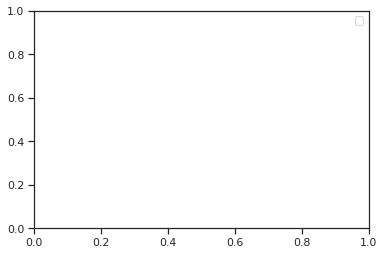

In [568]:
 # Univariate analysis of all attributes
 # BEFORE transforming them to normal distribution 
 for label in cols:
   plt.hist(df[label], color = 'blue', alpha = 0.7,  bins = 20)
   plt.title(label)
   plt.xlabel(label)
   plt.ylabel("Count")
   plt.show()
   plt.legend()

Some of the attributes are skewed, so we have to assess the skewness:

In [569]:
# Skewness of more than 1 is considered highly skewed.
df.agg(['skew', 'kurtosis']).transpose()

# Many of the attributes are highly skewed so we have to convert them to a normal distribution.

,skew,kurtosis
fix_acidity,0.941041,1.049673
vol_acidity,0.729279,1.249243
critic_acidity,0.312726,-0.788921
res_sugar,4.548153,29.364592
chloride,5.502487,38.624653
free_SO2,1.226579,1.892691
tot_SO2,1.540368,4.042257
density,0.044778,0.830659
pH,0.232032,0.879790
sulphate,2.406505,11.102282


Res_sugar, chloride, free_SO2, total_SO2 and sulphate need to be transformed to normal distribution. To do so, we used log funcion. 

In [570]:
df['res_sugar'] = np.log(df['res_sugar'])
df['chloride'] = np.log(df['chloride'])
df['free_SO2'] = np.log(df['free_SO2'])
df['tot_SO2'] = np.log(df['tot_SO2'])
df['sulphate'] = np.log(df['sulphate'])

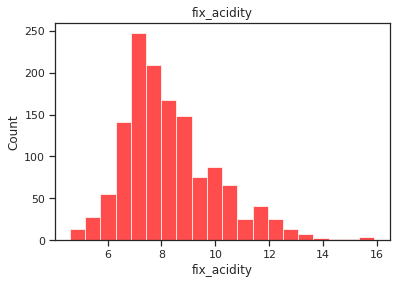

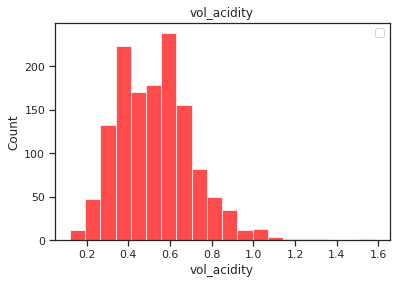

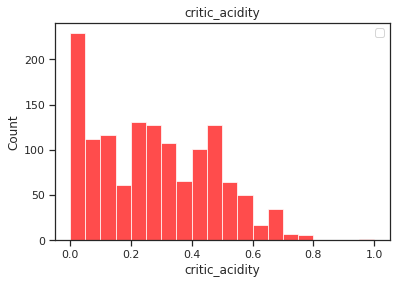

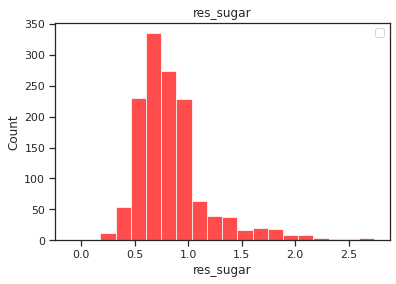

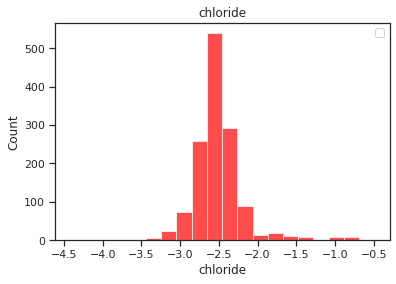

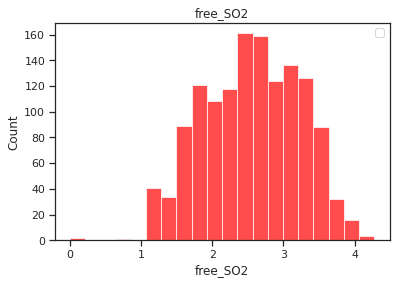

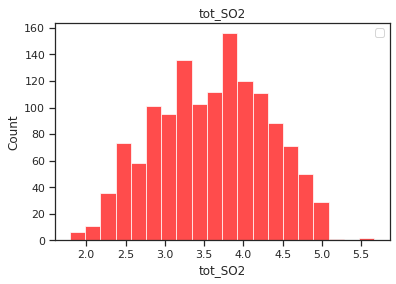

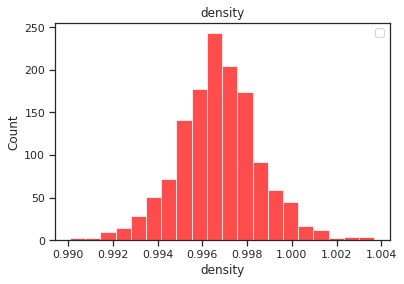

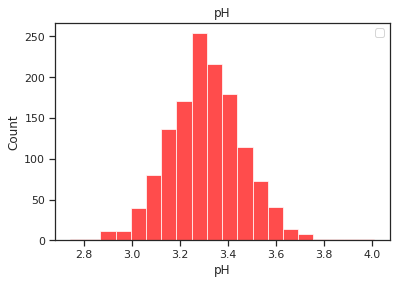

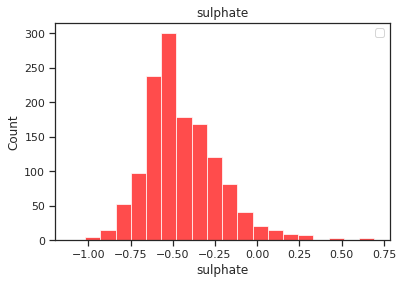

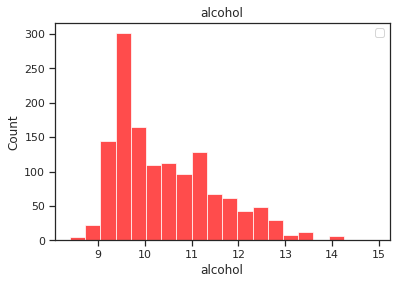

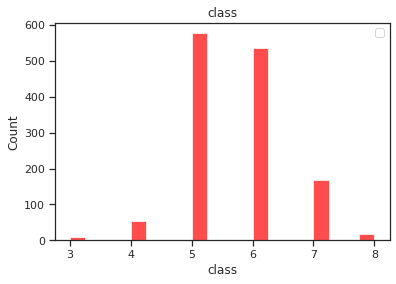

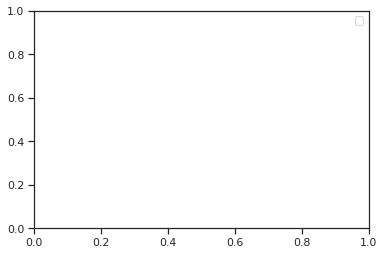

In [571]:
 # Univariate analysis of all attributes
 # AFTER transforming them to normal distribution 
 
 for label in cols:
   plt.hist(df[label], color = 'red', alpha = 0.7,  bins = 20)
   plt.title(label)
   plt.xlabel(label)
   plt.ylabel("Count")
   plt.show()
   plt.legend()

##Correlations and dependencies

In [572]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

vol_acidity      -0.395214
density          -0.184252
chloride         -0.181196
tot_SO2          -0.163977
pH               -0.055245
free_SO2         -0.046420
res_sugar         0.021653
fix_acidity       0.119024
critic_acidity    0.228057
sulphate          0.308728
alcohol           0.480343
dtype: float64


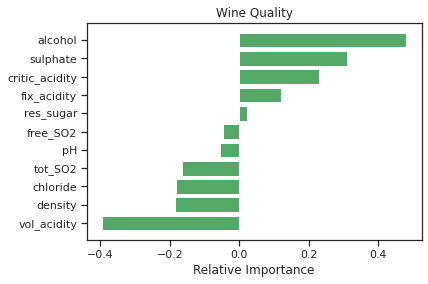

In [573]:
# Correlations between all attributes and Quality attribute
importances = df.drop("class", axis=1).apply(lambda x: x.corr(df["class"]))
indices = np.argsort(importances)
print(importances[indices])

#plot
names=cols[:-1]
plt.title('Wine Quality')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Looking at the grpah we can conclude that **the attributes with highest correlation with Quality are alcohol and vol_acidity.**


We only want to attributes with high correlation with the target variable. because they possibly have a high influence in predicting the target variable.

We set the threshold to 0.2 correlation. We keep input features only if the correlation of the input feature with the target variable is greater than 0.4 (positive or negative). 

In [ ]:
for i in range(0,len(cols[:-1])):
    for j in  range(0,len(cols[:-1])):
        if i!=j:
            corr_1=np.abs(df[df.columns[i]].corr(df[df.columns[j]]))
            if corr_1>0.750: #corr_1 <0.3:
            #     print( df.columns[i] , " is not correlated  with ", df.columns[j])
            # elif corr_1>0.75:
                print( df.columns[i] , " is highly  correlated  with ", df.columns[j])

free_SO2  is highly  correlated  with  tot_SO2
tot_SO2  is highly  correlated  with  free_SO2


In [ ]:
#df= df[["fix_acidity", "vol_acidity", "critic_acidity", "res_sugar", "chloride", "free_SO2", "tot_SO2", "pH","sulphate", "alcohol", "class"]] # No density
#df= df[["vol_acidity", "critic_acidity", "sulphate", "alcohol", "class"]] # only the ones more than 0.2 correlation stay

Conclusion of a lot of trial and error: Changing anything with in the list of attributes will decease the accuracy. So we will just leave them as it is. 

##Data Preparation

NORMALIZATION, OVERSAMPLING, AND PREPARATION OF SETS

We need to scale (normalize) the data for each attribute because of the high variability between the columns. To do so, we used standardization method - StandardScaler() function in python. Moreover, oversampling was done for the under sampled attributes usinf SMOTE. - scaling can and will induce over-fitting.

In [574]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [575]:
def scale_dataset(dataframe, oversample = False): #oversampling is set to false by default, for cases such as test set that we dont want oversampling
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values # Y is the class (Quality)

  # Take X and fit the transformer to X and transform all those values
  scaler = StandardScaler()
  #scaler = MinMaxScaler() # Min-Max method drastically decreases the accuracy of prediction models
  X = scaler.fit_transform(X)

  # Oversample - will match the size of the samples
  if oversample:
    # ros = RandomOverSampler()
    # X, y = ros.fit_resample(X,y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)

  # hstack: horizontally stack - side by side
  data = np.hstack((X, np.reshape(y, (-1,1)))) #X is 2D but y is 1D so we will reshape it to a 2D item - -1,1: -1 means infer what the length of y should be
  return data, X, y

In [576]:
# Convert to binary classification
# df.loc[df['class'] <= 5, 'class'] = 0
# df.loc[df['class'] > 5, 'class'] = 1

In [577]:
# Number of instrances in each class BEFORE
df["class"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: class, dtype: int64

In [578]:
train, test = np.split(df.sample(frac = 1, random_state = 48), [int(0.8*len(df))]) # divide dataframe to training set (80%) and test set (20%)
# Pre-process the datasets
train, X_train, y_train = scale_dataset(train, oversample = True)
test, X_test, y_test = scale_dataset(test, oversample = False)  # we dont want to oversample test set because we want them to be true testing/validation real life datasets

In [579]:
# Number of instrances in each class AFTER
df_test = pd.DataFrame(test,columns=df.columns)
df_train = pd.DataFrame(train, columns=df.columns)

df_test["class"].value_counts() + df_train["class"].value_counts()

3.0    466
4.0    479
5.0    577
6.0    576
7.0    496
8.0    468
Name: class, dtype: int64

In [580]:
df_train.describe()

,fix_acidity,vol_acidity,critic_acidity,res_sugar,chloride,free_SO2,tot_SO2,density,pH,sulphate,alcohol,class
count,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000
mean,-0.066251,0.323774,-0.079915,0.062369,-0.018297,-0.269011,-0.390424,-0.168047,0.170475,0.010733,0.319316,5.500000
std,0.907100,1.359802,1.028895,1.028643,0.995852,0.949691,0.963439,0.988540,0.956311,0.996789,1.107669,1.708131
min,-2.113380,-2.213370,-1.406710,-2.715238,-2.626424,-3.659376,-2.552686,-3.577668,-3.660547,-2.945694,-1.878612,3.000000
25%,-0.674785,-0.750500,-1.150085,-0.576592,-0.568212,-1.066158,-1.229089,-0.758175,-0.463875,-0.757664,-0.579292,4.000000
50%,-0.242614,0.062205,-0.082446,-0.164229,-0.158203,-0.319660,-0.421766,-0.143547,0.119561,-0.117928,0.163176,5.500000
75%,0.437665,1.118722,0.742690,0.429165,0.264109,0.441141,0.335810,0.470969,0.743861,0.713846,1.152220,7.000000
max,4.292576,5.696963,3.710909,5.431041,5.951311,2.530254,2.886938,3.499250,4.532168,5.042473,4.153944,8.000000


LABEL ENCODER - Quality attribute was translated to one-hot. This was mainly done because the neural network needs the class to be a numpy array. 

In [581]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [582]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
y_train_hot = np_utils.to_categorical(encoded_Y,  num_classes=11)

encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
y_test_hot = np_utils.to_categorical(encoded_Y, num_classes=11)
     

###Other visualizations used to understand the data

In [583]:
#  for i in cols[:-1]:
#    sns.displot(x = df_train[i], data = df_train, hue = df_train['class'], palette='deep')
#    plt.show()

In [584]:
# sns.set_theme(style="whitegrid", palette="muted")
# for label in cols:
# # Draw a categorical scatterplot to show each observation
#   sns.lmplot(x=label, y='class',  data=df, hue='class', fit_reg=False)

These visualizations lead to conclude that there is no apparent high correlation between any of the attributes. 

#Distance-based Algorithm


##kNN (neighbors)

In [585]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# confusion matrix
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.29      0.16        14
           5       0.67      0.51      0.58       112
           6       0.49      0.36      0.42       111
           7       0.31      0.52      0.39        31
           8       0.00      0.00      0.00         3

    accuracy                           0.43       272
   macro avg       0.26      0.28      0.26       272
weighted avg       0.52      0.43      0.46       272



Text(30.5, 0.5, 'Truth')

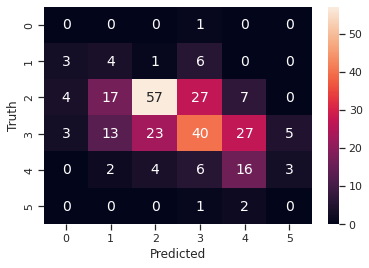

In [589]:
knn_model = KNeighborsClassifier(n_neighbors=3) # n = 3 has the best result
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**k-NN**

**PROS**:

• Simplicity

• Good predictive power in several
problems

• Inherently incremental: if new objects
are incorporated into the training set,
they will be automatically considered
when the algorithm needs to predict
the class of a new object

**CONS**:

• Long time required to classify new
objects

• Uses only local information to classify
new objects

• Sensitive to presence of irrelevant
attributes

• Predictive quantitative attributes should
be normalized

• Somewhat sensitive to the presence of
outliers

• No model, so no interpretation possible.

#Probability-based Algorithms


## LogisticRegression - Discriminative algorithm

The classification will be done by binary or multiclass according to the input data.

In [ ]:
# for label in cols[:-1]: # -1 : for all columns except for the last one (class)
#   # Density = True with normalize them so its easier and more correct for comparison of the two
#   plt.scatter(df_train[label], df_train["class"], alpha = 0.2)
#   plt.title(label)
#   plt.xlabel(label)
#   plt.ylabel("Class")
#   plt.legend()
#   plt.show()

Clearly we cannot use linear regression for this dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [590]:
model = LogisticRegression(max_iter = 10000, verbose = 0, random_state=16)#, solver='liblinear')
history = model.fit(X_train, y_train)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.16      0.43      0.23        14
           5       0.69      0.53      0.60       112
           6       0.55      0.32      0.41       111
           7       0.29      0.45      0.35        31
           8       0.00      0.00      0.00         3

    accuracy                           0.42       272
   macro avg       0.28      0.29      0.26       272
weighted avg       0.55      0.42      0.46       272



Text(30.5, 0.5, 'Truth')

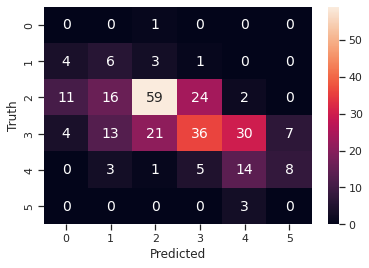

In [591]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
# We want high precision and low recall 

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In the example of wine quality predictoin, type I and type II error are equality unwanted, we can use f1-score as a parameter to evaluate the model's performance.


1.   The **precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
2.   The **recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
3.   The **F-beta score** can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
4.   The **support** is the number of occurrences of each class in y_test.



https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

LOGISTIC REGRESSION

**PROS**:

• Easily interpretable

• No hyper-parameters

**CONS**:

• Restricted to linearly separable binary classification tasks

• Number of instances must be larger than number of
attributes

• Sensitive to correlated predictive attributes

• Sensitive to outliers

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

## Naive Bayes - Generative algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.06      0.21      0.10        14
           5       0.70      0.57      0.63       112
           6       0.59      0.20      0.30       111
           7       0.23      0.45      0.30        31
           8       0.00      0.00      0.00         3

    accuracy                           0.38       272
   macro avg       0.26      0.24      0.22       272
weighted avg       0.56      0.38      0.42       272



Text(30.5, 0.5, 'Truth')

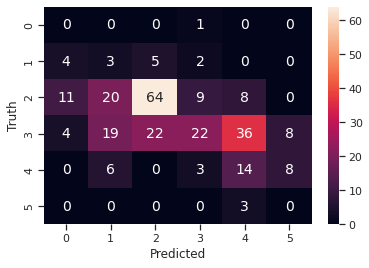

In [592]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Naive Bayes**

**PROS**:

• Good predictive performance in classification tasks where the predictive attributes are independent

• Robust to the presence of noise data
and irrelevant attributes

• Cast training, since it induces
classification models by looking at
the training set only once

• Prediction of class labels for new
objects is also fast

• Induced models are easy to interpret

• No hyper-parameters

**CONS**:

• One of the reasons for the fast learning is
also a limitation of NB: it does not take
into account relation between predictive
attributes

• Can benefit from feature selection

• Struggles to deal with continuous
quantitative values in the predictive
attributes

# Search-based Algorithms: predictive learning algorithm

##Artificial neural networks

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 4))
  
  ax1.plot(history.history["loss"], label='loss')
  ax1.plot(history.history["val_loss"], label='val_loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history["accuracy"], label='accuracy')
  ax2.plot(history.history["val_accuracy"], label='val_accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()

In [ ]:
#from keras.wrappers.scikit_learn import KerasClassifier

# for modeling
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  model = Sequential()
  model.add(Dense(100, input_shape=(X_train.shape[1],), activation='selu')) # input shape is (features,)
  model.add(Dense(50 , input_shape=(X_train.shape[1],), activation='selu'))
  model.add(Dense(20 , input_shape=(X_train.shape[1],), activation='selu'))
  model.add(Dense(12 , input_shape=(X_train.shape[1],), activation='selu'))
  model.add(Dense(11, activation='softmax'))


  model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

  # early stopping callback
  # This callback will stop the training when there is no improvement in the validation loss for 10 consecutive epochs.  
  es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                    mode='min',
                                    patience=10, 
                                    restore_best_weights=True)

  history = model.fit(
    X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, shuffle=True, verbose = 0#, callbacks=[es]
  )

  return model, history

Hyper parameter tuning for Neural network

In [ ]:
# least_val_loss = float ('inf')
# least_loss_model = None
# epochs = 10000

# for num_nodes in [16, 32, 64]:
#   for dropout_prob in [0, 0.2]:
#     for lr in [0.1, 0.005, 0.001]:
#       for batch_size in [32, 64, 128]:
#         print(f"nodes {num_nodes}, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}, epochs {epochs}")
#         model, history = train_model(X_train, y_train_hot, num_nodes, dropout_prob, lr, batch_size, epochs)
#         plot_history(history)
#         val_loss = model.evaluate(X_test, y_test_hot)
#         if val_loss[0] < least_val_loss:
#           least_val_loss = val_loss[0]
#           least_loss_model = model

# this step can take upto one hour to run

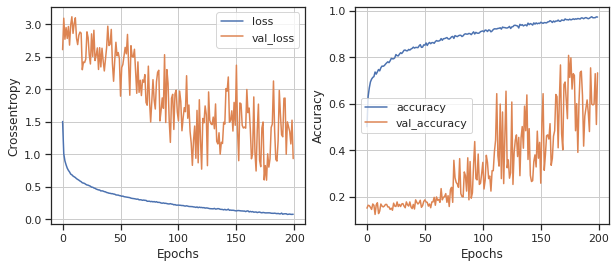

9/9 [==============================] - 0s 2ms/step - loss: 4.7850 - accuracy: 0.4926
[4.785017013549805, 0.49264705181121826]
9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.14      0.21      0.17        14
           2       0.62      0.50      0.55       112
           3       0.52      0.56      0.54       111
           4       0.39      0.42      0.41        31
           5       0.00      0.00      0.00         3

    accuracy                           0.49       272
   macro avg       0.28      0.28      0.28       272
weighted avg       0.52      0.49      0.50       272



Text(30.5, 0.5, 'Truth')

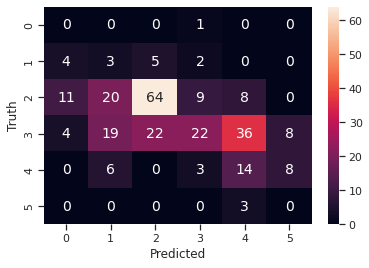

In [593]:
num_nodes = 16
dropout_prob = 0.2
lr = 0.01
batch_size = 32
epochs = 200

model, history = train_model(X_train, y_train_hot, num_nodes, dropout_prob, lr, batch_size, epochs)
plot_history(history)
val_loss = model.evaluate(X_test, y_test_hot)
print(val_loss)

y_preds = model.predict(X_test)

#y_preds = least_loss_model.predict(X_test)
print(classification_report(y_test_hot.argmax(axis=1), y_preds.argmax(axis=1), zero_division=0))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Neural Network**

**PROS**:

• Exhibits most of the positive aspects
of ANNs

• deep network models have exhibited
very good performance in many real
problems, superior to several
state-of-the-art ML algorithms

• Very robust in the presence of noise

• Able to extract relevant features from
raw data

• Similar to several features found in
the nervous system.

**CONS**:

• Exhibits most of the deficiencies of ANNs

• DL needs of a large number of training
examples

• Lack of strong mathematical foundation

##Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.29      0.17        14
           5       0.63      0.52      0.57       112
           6       0.58      0.45      0.51       111
           7       0.34      0.52      0.41        31
           8       0.00      0.00      0.00         3

    accuracy                           0.47       272
   macro avg       0.28      0.30      0.28       272
weighted avg       0.54      0.47      0.50       272

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.06      0.21      0.10        14
           5       0.70      0.57      0.63       112
           6       0.59      0.20      0.30       111
           7       0.23      0.45      0.30        31
           8       0.00      0.00      0.00         3

    accuracy                           0.38       272
   macro avg       0.26

Text(30.5, 0.5, 'Truth')

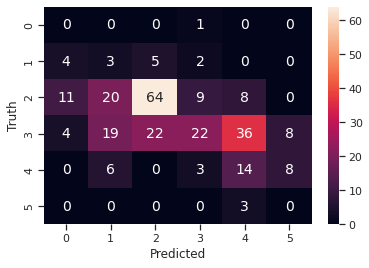

In [594]:
svm_model = SVC()
# OVO
ovo = OneVsOneClassifier(svm_model)
ovo.fit(X_train, y_train)
y_pred_ovo = ovo.predict(X_test)
print(classification_report(y_test, y_pred_ovo, zero_division=0))

# svm_model.fit(X_train, y_train)
# y_pred = svm_model.predict(X_test)
# print(classification_report(y_test, y_pred, zero_division=0))

# OVR
#ovr = OneVsRestClassifier(svm_model)
#ovr.fit(X_train, y_train)
#y_pred_ovr = ovr.predict(X_test)
#print(classification_report(y_test, y_pred_ovr, zero_division=0)) OVR has 37% - poor results

print(classification_report(y_test, y_pred, zero_division=0))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**SVM**

**PROS**:

• SVM models have strong theoretical
foundations

• SVM models have exhibited good
predictive performance in many
problems

**CONS**:

• Very sensitive to hyper-parameter values

• Computational cost depends on the number
of support vectors of the model, which can be
large in some problems

• Original technique can only deal with binary
classification tasks

##AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics

Accuracy: 0.4852941176470588
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.07      0.10        14
           5       0.61      0.59      0.60       112
           6       0.49      0.50      0.49       111
           7       0.36      0.32      0.34        31
           8       0.00      0.00      0.00         3

    accuracy                           0.49       272
   macro avg       0.27      0.25      0.26       272
weighted avg       0.50      0.49      0.49       272



Text(30.5, 0.5, 'Truth')

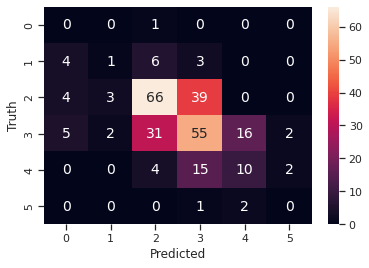

In [595]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.01)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#lr = 1
# n=50 -> 28%
# n=100 -> 28%
# n= 500 -> 28%

#lr = 0.1
# n=50 -> 33%
# n=100 -> 35.9%
print(classification_report(y_test, y_pred, zero_division=0))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**AdaBoost**

**PROS**:

• Good predictive performance in several
problems

• Easy to define/tune its hyper-parameter

**CONS**:

• Computationally expensive since the
number of generated models depends on
the number of iterations and there is no
parallelization possibile because it is a
sequential algorithm

• Hard to interpret